In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

plt.style.use('ggplot')


## 1. Load Dataset
We load the financial news dataset and parse the `date` column for time-series analysis.


In [13]:
df = pd.read_csv("../data/raw_analyst_ratings.csv", parse_dates=["date"], infer_datetime_format=True)
df.head()
print("Shape:", df.shape)
df.info()
df.isna().sum()

C:\Users\a_kas\AppData\Local\Temp\ipykernel_15904\1098970977.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv("../data/raw_analyst_ratings.csv", parse_dates=["date"], infer_datetime_format=True)


Shape: (1407328, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

## 3. Descriptive Statistics
### 3.1 Headline Text Length
We compute the length of headlines to understand distribution and writing patterns.


In [5]:
## 3. Descriptive Statistics
# 3.1 Headline Text Length
df['headline_length'] = df['headline'].apply(len)
df['headline_length'].describe()


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

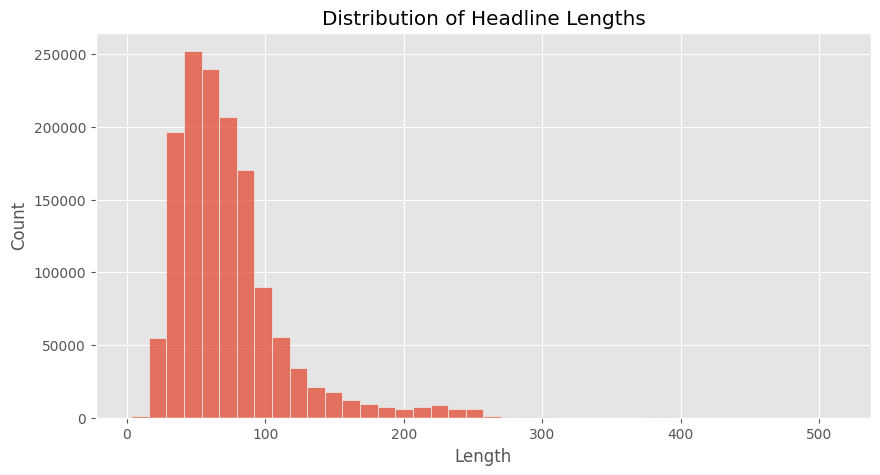

In [6]:
plt.figure(figsize=(10,5))
sns.histplot(df["headline_length"], bins=40)
plt.title("Distribution of Headline Lengths")
plt.xlabel("Length")
plt.ylabel("Count")
plt.show()


### 3.2 Publisher Article Count
Which publishers contribute the most headlines?


In [7]:
publisher_counts = df["publisher"].value_counts()
publisher_counts.head(10)


publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64

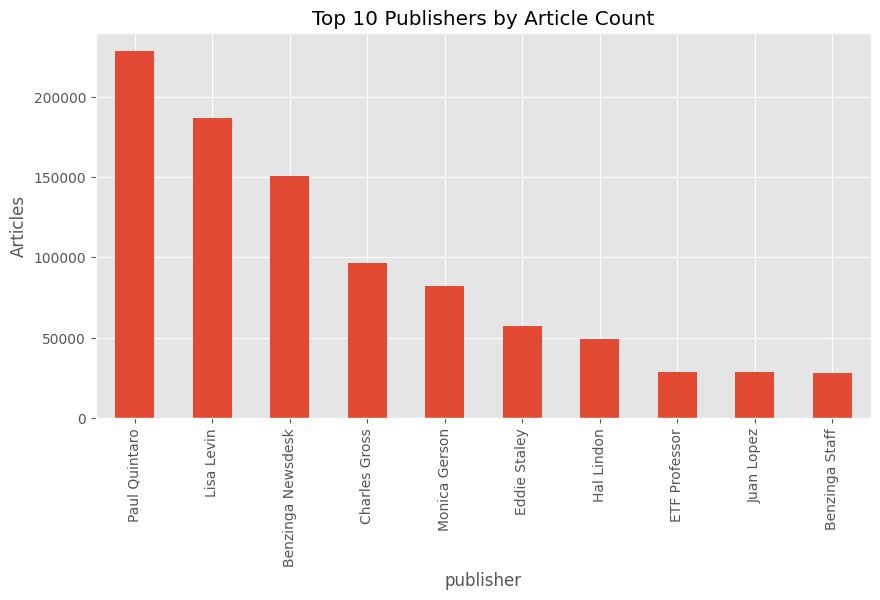

In [8]:
publisher_counts.head(10).plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Publishers by Article Count")
plt.ylabel("Articles")
plt.show()


## 4. Time Series Analysis
### 4.1 Articles per Day
This helps us identify spikes in news volume.


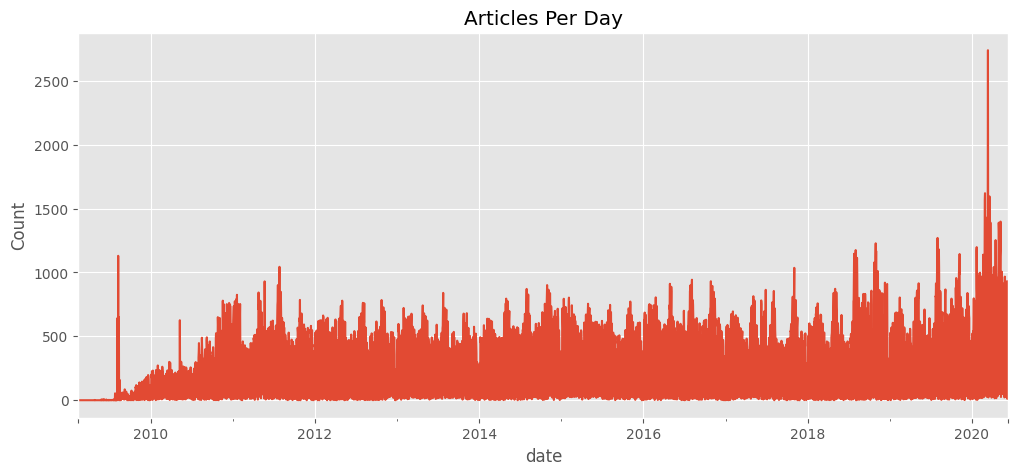

In [11]:
df['date'] = pd.to_datetime(df['date'], format='mixed', utc=True)
articles_per_day = df.set_index("date").resample("D").size()

plt.figure(figsize=(12,5))
articles_per_day.plot()
plt.title("Articles Per Day")
plt.ylabel("Count")
plt.show()


### 4.2 Hour of Publishing
This helps us see when news is typically released.


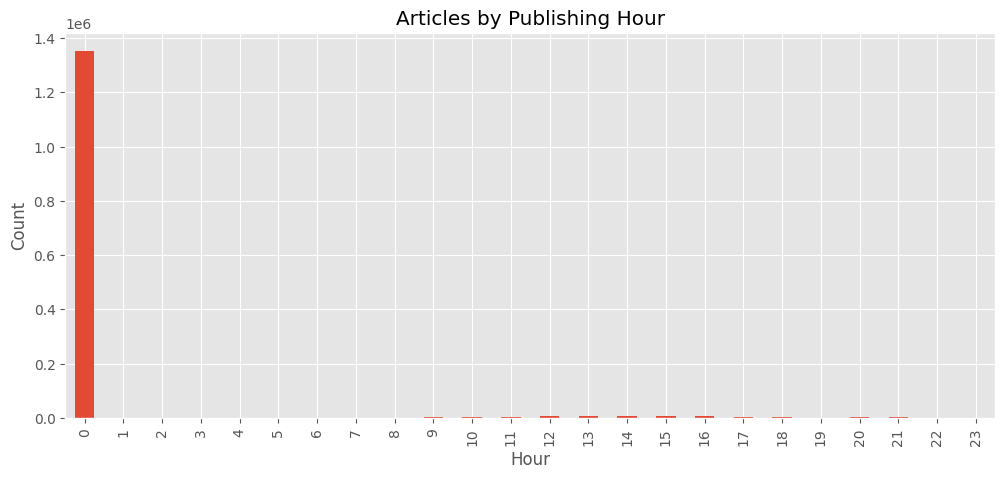

In [12]:
df["hour"] = df["date"].dt.hour

plt.figure(figsize=(12,5))
df["hour"].value_counts().sort_index().plot(kind='bar')
plt.title("Articles by Publishing Hour")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.show()


## 5. Text Analysis
Extract the most common words from headlines.


In [ ]:
text = " ".join(df["headline"]).lower()
words = re.findall(r"\b\w+\b", text)
common_words = Counter(words).most_common(20)
common_words




[('to', 404127),
 ('of', 270981),
 ('0', 255841),
 ('on', 245970),
 ('for', 239917),
 ('s', 239752),
 ('in', 223581),
 ('the', 213218),
 ('vs', 162099),
 ('stocks', 161776),
 ('est', 140604),
 ('eps', 128897),
 ('from', 120805),
 ('market', 120558),
 ('1', 119001),
 ('shares', 114313),
 ('and', 113924),
 ('reports', 108710),
 ('update', 91723),
 ('earnings', 87399)]